In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_30_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_30_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	807.4956

Best Fitness:	752.7228
Solution:	700.0000
Diff:		52.7228

[0:04:28][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	837.3548

Best Fitness:	778.1182
Solution:	700.0000
Diff:		78.1182

[0:08:21][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	800.8541

Best Fitness:	755.0757
Solution:	700.0000
Diff:		55.0757

[0:11:53][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	857.0759

Best Fitness:	781.7139
Solution:	700.0000
Diff:		81.7139

[0:15:05][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	798.1772

Best Fitness:	739.6390
Solution:	700.0000
Diff:		39.6390

[0:18:33][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	851.3957

Best Fitness:	778.0862
Solution:	700.0000
Diff:		78.0862

[0:21:43][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	805.7700

Best Fitness:	757.9040
Solution:	700.0000
Diff:		57.9040

[0:24:55][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	882.1645

Best Fitness:	796.5753
Solution:	700.0000
Diff:		96.5753

[0:27:54][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	863.8227

Best Fitness:	788.0095
Solution:	700.0000
Diff:		88.0095

[0:31:03][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	844.8314

Best Fitness:	777.7656
Solution:	700.0000
Diff:		77.7656

[0:34:18][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	848.9997

Best Fitness:	776.4760
Solution:	700.0000
Diff:		76.4760

[0:37:24][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	842.1894

Best Fitness:	776.1143
Solution:	700.0000
Diff:		76.1143

[0:40:19][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	810.1375

Best Fitness:	768.2518
Solution:	700.0000
Diff:		68.2518

[0:43:17][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	854.0658

Best Fitness:	785.2171
Solution:	700.0000
Diff:		85.2171

[0:46:29][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	847.4807

Best Fitness:	776.1773
Solution:	700.0000
Diff:		76.1773

[0:49:33][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	853.2040

Best Fitness:	789.8243
Solution:	700.0000
Diff:		89.8243

[0:52:23][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	819.9854

Best Fitness:	756.0462
Solution:	700.0000
Diff:		56.0462

[0:55:17][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	795.2698

Best Fitness:	745.6690
Solution:	700.0000
Diff:		45.6690

[0:58:27][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	813.9721

Best Fitness:	759.9678
Solution:	700.0000
Diff:		59.9678

[1:01:43][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	829.1672

Best Fitness:	762.1179
Solution:	700.0000
Diff:		62.1179

[1:04:59][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	813.6302

Best Fitness:	756.1094
Solution:	700.0000
Diff:		56.1094

[1:07:54][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	844.4629

Best Fitness:	764.1282
Solution:	700.0000
Diff:		64.1282

[1:11:00][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	828.7465

Best Fitness:	760.8996
Solution:	700.0000
Diff:		60.8996

[1:13:54][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	820.0628

Best Fitness:	742.0301
Solution:	700.0000
Diff:		42.0301

[1:17:00][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	850.5185

Best Fitness:	780.7583
Solution:	700.0000
Diff:		80.7583

[1:19:47][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	807.5662

Best Fitness:	756.9713
Solution:	700.0000
Diff:		56.9713

[1:22:53][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	824.2260

Best Fitness:	763.2542
Solution:	700.0000
Diff:		63.2542

[1:25:45][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	856.0136

Best Fitness:	785.9621
Solution:	700.0000
Diff:		85.9621

[1:28:59][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	820.1096

Best Fitness:	755.4282
Solution:	700.0000
Diff:		55.4282

[1:32:07][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	842.7178

Best Fitness:	757.9697
Solution:	700.0000
Diff:		57.9697

[1:35:09][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	818.8001

Best Fitness:	756.6403
Solution:	700.0000
Diff:		56.6403

[1:38:06][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	859.5880

Best Fitness:	767.6839
Solution:	700.0000
Diff:		67.6839

[1:41:14][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	799.8253

Best Fitness:	746.1440
Solution:	700.0000
Diff:		46.1440

[1:44:35][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	845.1687

Best Fitness:	764.2074
Solution:	700.0000
Diff:		64.2074

[1:47:32][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	829.3917

Best Fitness:	765.5585
Solution:	700.0000
Diff:		65.5585

[1:50:43][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	826.7698

Best Fitness:	753.3345
Solution:	700.0000
Diff:		53.3345

[1:53:48][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	847.8254

Best Fitness:	768.6830
Solution:	700.0000
Diff:		68.6830

[1:57:02][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	824.7522

Best Fitness:	766.2887
Solution:	700.0000
Diff:		66.2887

[1:59:58][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	853.7495

Best Fitness:	771.1495
Solution:	700.0000
Diff:		71.1495

[2:03:05][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	813.7874

Best Fitness:	760.0337
Solution:	700.0000
Diff:		60.0337

[2:06:16][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	823.6124

Best Fitness:	733.6398
Solution:	700.0000
Diff:		33.6398

[2:09:24][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	805.7199

Best Fitness:	755.1699
Solution:	700.0000
Diff:		55.1699

[2:12:22][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	817.8647

Best Fitness:	768.7269
Solution:	700.0000
Diff:		68.7269

[2:15:23][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	814.2751

Best Fitness:	758.0737
Solution:	700.0000
Diff:		58.0737

[2:18:18][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	822.1562

Best Fitness:	766.4084
Solution:	700.0000
Diff:		66.4084

[2:21:20][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	843.6413

Best Fitness:	771.4807
Solution:	700.0000
Diff:		71.4807

[2:24:34][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	850.9853

Best Fitness:	791.2553
Solution:	700.0000
Diff:		91.2553

[2:27:40][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	808.7604

Best Fitness:	750.6502
Solution:	700.0000
Diff:		50.6502

[2:30:45][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	822.2050

Best Fitness:	752.4540
Solution:	700.0000
Diff:		52.4540

[2:33:46][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	830.2726

Best Fitness:	762.3438
Solution:	700.0000
Diff:		62.3438

[2:36:43][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	819.2698

Best Fitness:	759.4893
Solution:	700.0000
Diff:		59.4893

[2:39:53][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:39:53

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,157.797430,93.881955,151.74339,128.004237,92.673399,114.785811,146.987706,150.077231,91.746173,143.580558,...,110.525115,112.409455,133.302801,128.940212,148.990178,122.913936,116.449508,135.117385,139.593236,50
94,117.680974,93.881955,151.74339,128.004237,92.673399,114.785811,146.987706,147.999575,91.746173,143.580558,...,110.525115,112.409455,133.302801,128.940212,123.370778,122.913936,116.449508,135.117385,78.677732,50
95,117.680974,93.881955,151.74339,115.278621,92.673399,114.785811,146.987706,122.220518,91.746173,134.836724,...,108.438515,112.409455,133.302801,128.940212,123.370778,122.913936,116.449508,135.117385,78.677732,50
96,117.680974,93.881955,151.74339,115.278621,92.673399,114.785811,146.987706,122.220518,91.746173,134.836724,...,108.438515,112.409455,125.774728,88.956106,123.370778,122.913936,116.449508,135.117385,78.677732,50
97,117.680974,93.881955,151.74339,115.278621,92.673399,114.785811,146.987706,122.220518,91.746173,134.836724,...,108.438515,112.409455,125.774728,88.956106,123.370778,122.913936,116.449508,135.117385,78.677732,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 52.72281883689345

Best error for run 1: 78.11821756690551

Best error for run 2: 55.075745857862216

Best error for run 3: 81.71389240434485

Best error for run 4: 39.63900922442383

Best error for run 5: 78.086209831573

Best error for run 6: 57.904043031493075

Best error for run 7: 96.5753128882003

Best error for run 8: 88.00948963841984

Best error for run 9: 77.76556877578491

Best error for run 10: 76.475952367329

Best error for run 11: 76.11427675366565

Best error for run 12: 68.25176655471705

Best error for run 13: 85.21708977869764

Best error for run 14: 76.17731723451323

Best error for run 15: 89.82430683356336

Best error for run 16: 56.046212710772465

Best error for run 17: 45.668973012043125

Best error for run 18: 59.967844338146165

Best error for run 19: 62.11787749539769

Best error for run 20: 56.10938956357825

Best error for run 21: 64.12816843050655

Best error for run 22: 60.89959748173317

Best error for run 23: 42.03012636274434

Best error for run 24: 80.75826645237544

Best error for run 25: 56.97133473298186

Best error for run 26: 63.25424857305029

Best error for run 27: 85.96207677866255

Best error for run 28: 55.42820163555518

Best error for run 29: 57.969726440205136

Best error for run 30: 56.64028221474143

Best error for run 31: 67.68394985164934

Best error for run 32: 46.144010207310885

Best error for run 33: 64.20740489258083

Best error for run 34: 65.5584794391741

Best error for run 35: 53.33445865686849

Best error for run 36: 68.68301442431505

Best error for run 37: 66.28870285198786

Best error for run 38: 71.14954766615551

Best error for run 39: 60.033723816042425

Best error for run 40: 33.63981810036819

Best error for run 41: 55.16987163337694

Best error for run 42: 68.72694547036485

Best error for run 43: 58.07374227164223

Best error for run 44: 66.40837460912155

Best error for run 45: 71.48066928466551

Best error for run 46: 91.25525699080231

Best error for run 47: 50.65023834659746

Best error for run 48: 52.45398719163438

Best error for run 49: 62.34379147582729

Best error for run 50: 59.48929097810765

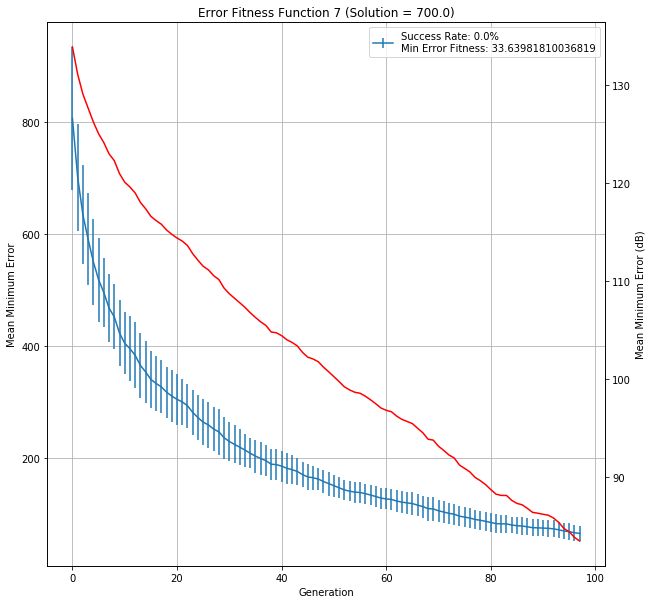

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_30_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,30,0.1,52.722819,78.118218,55.075746,81.713892,39.639009,78.08621,...,66.408375,71.480669,91.255257,50.650238,52.453987,62.343791,59.489291,64.988208,2:39:53,30000
